In [ ]:
# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# import statements
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.color as color
import pickle
import math
from sklearn.utils import shuffle

%matplotlib inline

In [47]:
# Load pickled data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [30]:
print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


In [31]:
# helper functions
def print_random_images(first_set, labels_set, second_set = None, count = 4):
    """prints random images from the given first and second set, count is how many images to take
    """
    images = []
    labels = []
    if second_set is None:
        rows = count//4
        cols = count//2
    else:
        rows = count//2
        cols = count//2
        
    for i in range(count):
        index = random.randint(0, len(first_set) - 1)
        images.append(first_set[index])
        labels.append(labels_set[index])
        if second_set is not None:
            images.append(second_set[index])
            labels.append(labels_set[index])
           
    print_images(images, labels, row=rows, col=cols)
    
def print_images(data, labels, row = 1, col = 1, cmap = 'gray'):
    """print images from given data array
    """
    row = np.max([math.ceil(row), 1])
    col = np.max([math.ceil(col), 1])
    if row == 1 and col == 1: 
        plt.figure(figsize=(1,1))
        plt.imshow(data[0], cmap=cmap)
    else:
        row_col = row*col
        fig, axs = plt.subplots(row, col, figsize=(row_col, row_col))
        fig.subplots_adjust(hspace = .2, wspace=.1)
        axs = axs.ravel()
        total = np.min([len(data), row_col])
        for x in range(total):
#             print('x: ', x, 'data[x].shape', data[x].shape)
            axs[x].axis('off')
            if labels is not None:
                axs[x].set_title(labels[x])
            if cmap is None:
                axs[x].imshow(data[x].squeeze())  
            else:
                axs[x].imshow(data[x].squeeze(), cmap=cmap)  

def normalize(data):
    """Normalize the given data"""
    return (data - np.min(data))/ (np.max(data) - np.min(data))

def convert_to_grayscale(data):
    """Convert the given images data to grayscale, using the average of the RGB channel. 
    Returns one dimension channel instead of 3"""
    return np.sum(data/3, axis=3, keepdims=True)

            
print('helper functions defined')

helper functions defined


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [48]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

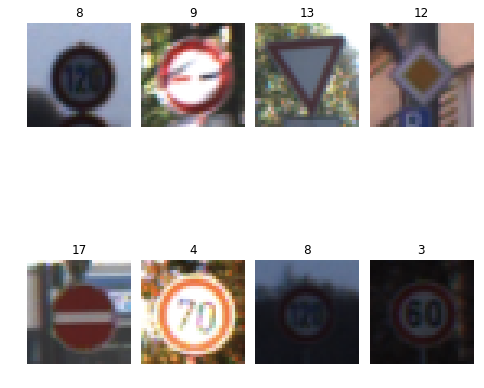

In [43]:
print_random_images(X_train, y_train, count=8)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [49]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#convert to grayscale
X_train_gray = convert_to_grayscale(X_train)
X_valid_gray = convert_to_grayscale(X_valid)
X_test_gray = convert_to_grayscale(X_test)

print("Train Image data shape =", X_train_gray[0].shape)
print("Valid Image data shape =", X_valid_gray[0].shape)
print("Test Image data shape =", X_test_gray[0].shape)
print('done')

Train Image data shape = (32, 32, 1)
Valid Image data shape = (32, 32, 1)
Test Image data shape = (32, 32, 1)
done


Showing grayscaled images along with its color counterpart


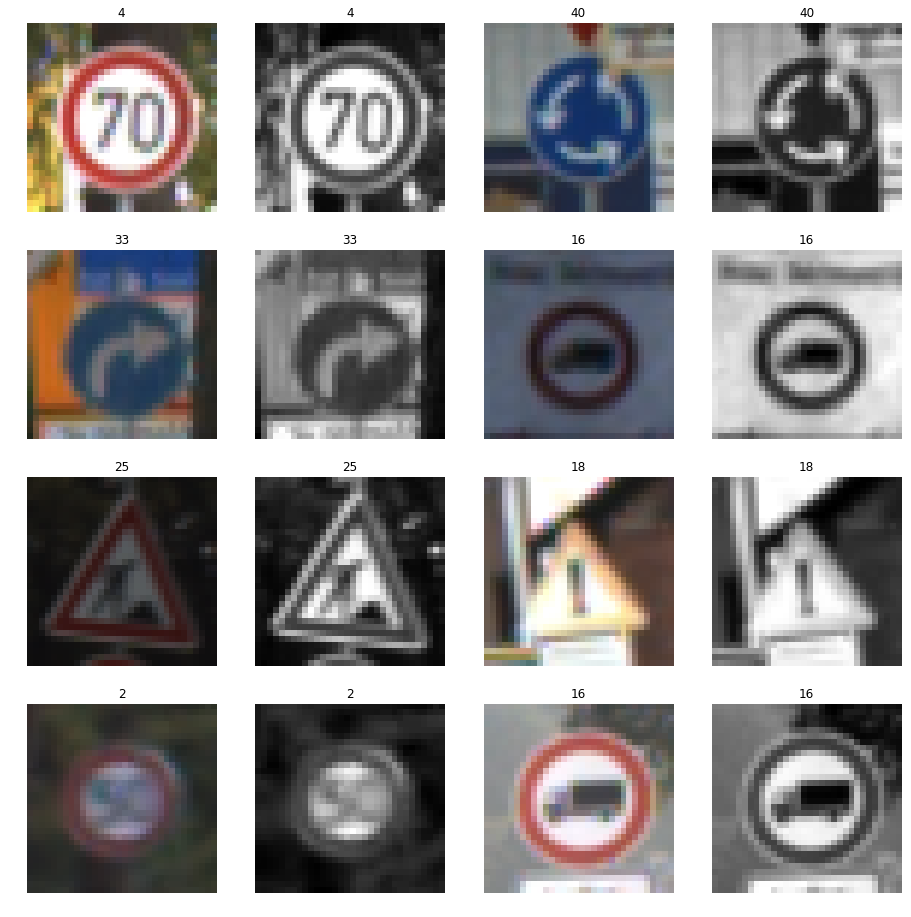

In [51]:
print('Showing grayscaled images along with its color counterpart')
print_random_images(X_train, y_train, X_train_gray, 8)

X_train = X_train_gray
X_valid = X_valid_gray
X_test = X_test_gray

In [9]:
#normalize the data

print('mean before normalization')
print('train: ', np.mean(X_train))
print('valid: ', np.mean(X_valid))
print('test:  ', np.mean(X_test))

X_train_norm = normalize(X_train)
X_valid_norm = normalize(X_valid)
X_test_norm = normalize(X_test)

print('\nmean after normalization')
print('train: ', np.mean(X_train_norm))
print('valid: ', np.mean(X_valid_norm))
print('test:  ', np.mean(X_test_norm))

mean before normalization
train:  82.677589037
valid:  83.5564273756
test:   82.1484603612

mean after normalization
train:  0.314367065134
valid:  0.314225709503
test:   0.311348447654


Analyzing images before and after normalization. Normalization should not alter the images


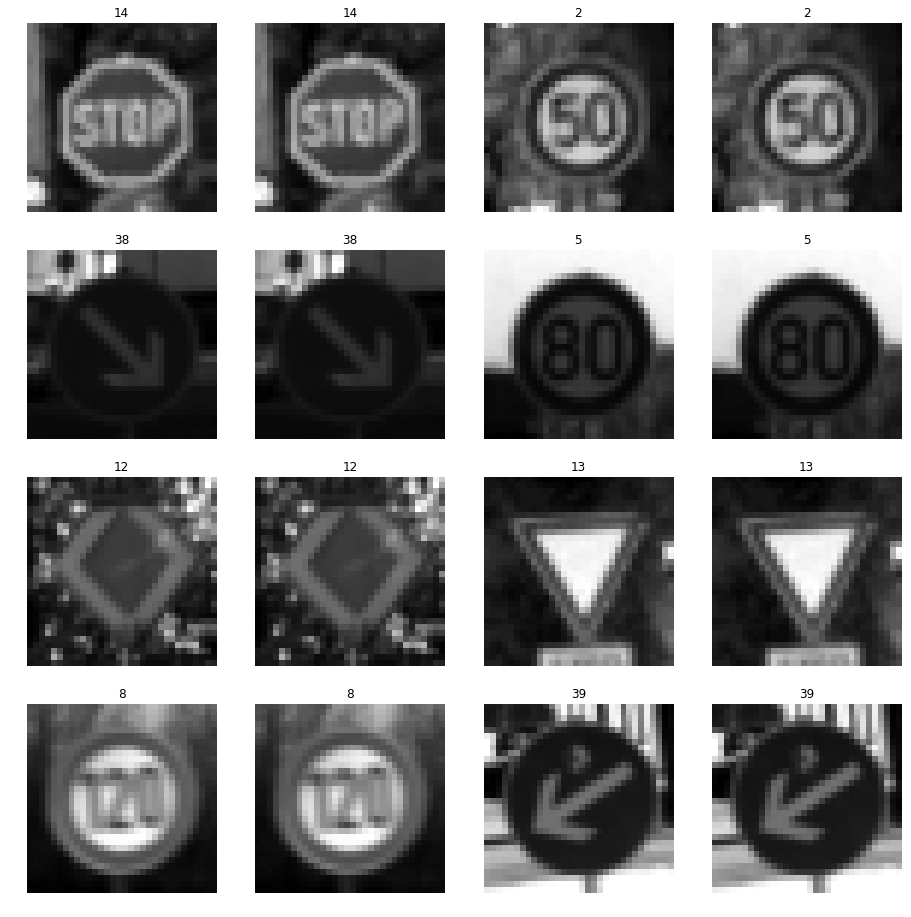

In [10]:
# Analyzing images before and after normalization. Normalization should not alter the images
print('Analyzing images before and after normalization. Normalization should not alter the images')
print_random_images(X_train, y_train, X_train_norm, 8)

X_train = X_train_norm
X_valid = X_valid_norm
X_test = X_test_norm

# Augmentation
I did not choose to do Augmentation, since without the Augmentation I was getting good accuracy.   

But augmentation should be used whenever the training data is less or the distribution of the data is not even. Like if some classes have higher number of training data while some has less. Using Augmentation the training data can be increased


### Model Architecture

I found LeNet to be very simple for this project, hence I used 4 Convolutional Layers and 4 Fully Connected layers

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 90
BATCH_SIZE = 128
FC1 = 320
FC2 = 150
FC3 = 80
_, _, CHANNEL = X_train[0].shape
filter1 = 6
filter2 = 16
filter3 = 26
filter4 = 42
# filter5 = 30
print('Channel count: ', CHANNEL)

Channel count:  1


In [12]:
# functions for architecture
def create_weights(shape):
    sigma = 0.1
    mu = 0
#     print('create weight: ', shape)
    return tf.Variable(tf.truncated_normal(shape, mean = mu, stddev = sigma))
 
def create_biases(size):
    return tf.Variable(tf.constant(0.05, shape=[size]))

def create_conv_layer(input,
               input_channel,        
               filter_count,
               filter_size = 5,
               drop_out = 1,
               padding='VALID',
               do_max_pool=True):  
    """Create the convolutional layer"""
    strides = [1, 1, 1, 1]
    mu = 0
    sigma = 0.1

    weights = create_weights(shape=[filter_size, filter_size, input_channel, filter_count])
    biases = create_biases(filter_count)

    ## Creating the convolutional layer
    layer = tf.nn.conv2d(input,
                     weights,
                     strides=strides,
                     padding=padding) + biases
    if do_max_pool:
        layer = tf.nn.max_pool(value=layer,
                            ksize=[1, 2, 2, 1],
                            strides=[1, 2, 2, 1],
                            padding=padding)
        print('Max Pool done')

    layer = tf.nn.relu(layer)

    print('Conv Layer output: ', layer.get_shape())
    return layer

def create_connected_layer(input,
                            num_inputs,
                            num_outputs,
                            use_relu=True):
    """Create fully connected layer"""
    weights = create_weights(shape=[num_inputs, num_outputs])
    biases = create_biases(num_outputs)
    layer = tf.add(tf.matmul(input, weights), biases)
    if use_relu:
        layer = tf.nn.relu(layer)
        print('Relu done')
    print('Fully connected Layer output: ', layer.get_shape())
    return layer

In [13]:
#Convolution architecture

from tensorflow.contrib.layers import flatten

def get_logits(x):
    """Get the logits, modified the LeNet architecture"""
    
    #Layer 1: Convolutional. Input = 32x32xCHANNEL. Output = 30x30xfilter1.
    c1 = create_conv_layer(x, CHANNEL, filter1, filter_size=3, do_max_pool=False)
    
    #Layer 2: Convolutional. Output = 14x14xfilter2.
    c2 = create_conv_layer(c1, filter1, filter2, filter_size=3, do_max_pool=True)
    
    c2 = tf.nn.dropout(c2, drop_out_conv)
    
    #Layer 3: Convolutional. Output = 6x6xfilter3.
    c3 = create_conv_layer(c2, filter2, filter3, padding='VALID', filter_size=3, do_max_pool=True)
    
    c3 = tf.nn.dropout(c3, drop_out_conv)

    #Layer 4: Convolutional. Output = 6x6xfilter4.
    c4 = create_conv_layer(c3, filter3, filter4, padding='SAME', filter_size=5, do_max_pool=False)
    
    
    #Flatten. Input = 4x4xfilter3. Output = FC_input.
    flatten = tf.contrib.layers.flatten(c4)
    print('flatten shape: ', flatten.get_shape())
    _,flatten_shape = flatten.get_shape()
    
    #Layer 5: Fully Connected. Input = FC_input. Output = FC1.
    fc1 = create_connected_layer(flatten, int(flatten_shape), FC1)
    
    fc1 = tf.nn.dropout(fc1, drop_out_fc)
    
    #Layer 6: Fully Connected. Input = FC1. Output = FC2.
    fc2 = create_connected_layer(fc1, FC1, FC2)
    
    fc2 = tf.nn.dropout(fc2, drop_out_fc)
    
    #Layer 7: Fully Connected. Input = FC2. Output = FC3.
    fc3 = create_connected_layer(fc2, FC2, FC3)
    
    fc3 = tf.nn.dropout(fc3, drop_out_fc)
    
    #Layer 8: Fully Connected. Input = FC3. Output = 43.
    logits = create_connected_layer(fc3, FC3, n_classes, False)
    
    return logits

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, CHANNEL))
y = tf.placeholder(tf.int32, (None))
drop_out_conv = tf.placeholder(tf.float32)
drop_out_fc = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [15]:
rate = 0.001

logits = get_logits(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Conv Layer output:  (?, 30, 30, 6)
Max Pool done
Conv Layer output:  (?, 14, 14, 16)
Max Pool done
Conv Layer output:  (?, 6, 6, 26)
Conv Layer output:  (?, 6, 6, 42)
flatten shape:  (?, 1512)
Relu done
Fully connected Layer output:  (?, 320)
Relu done
Fully connected Layer output:  (?, 150)
Relu done
Fully connected Layer output:  (?, 80)
Fully connected Layer output:  (?, 43)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#returns total loss and total accuracy

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], \
                                  feed_dict={x: batch_x, y: batch_y, drop_out_fc:1., drop_out_conv:1.})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss/num_examples, total_accuracy / num_examples

In [17]:
# #train model
saver = tf.train.Saver()
model_name = 'trafficSignModel'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    valid_loss_all = []
    train_loss_all = []
    valid_acc_all = []
    train_acc_all = []
    best_valid_acc = 0
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,  drop_out_fc:.5, drop_out_conv:.7})
        
        #evaluate training data   
        train_loss, train_accuracy = evaluate(X_train, y_train)
        train_loss_all.append(train_loss)
        train_acc_all.append(train_accuracy)

        #evaluate Validation Data
        valid_loss, valid_accuracy = evaluate(X_valid, y_valid)
        valid_loss_all.append(valid_loss)
        valid_acc_all.append(valid_accuracy)
        print("EPOCH {}, T Loss: {:.3f}, V Loss: {:.3f}, T Acc: {:.3f}, V Acc: {:.3f}"\
              .format(i+1, train_loss, valid_loss, train_accuracy, valid_accuracy))
        
        if valid_accuracy > best_valid_acc:
            best_valid_acc = valid_accuracy
            saver.save(sess, model_name)
    print("Model saved with best validation accuracy of: {:.3f}".format(best_valid_acc))

Training...

EPOCH 1, T Loss: 3.407, V Loss: 3.487, T Acc: 0.094, V Acc: 0.082
EPOCH 2, T Loss: 2.152, V Loss: 2.260, T Acc: 0.354, V Acc: 0.326
EPOCH 3, T Loss: 1.097, V Loss: 1.188, T Acc: 0.632, V Acc: 0.589
EPOCH 4, T Loss: 0.603, V Loss: 0.674, T Acc: 0.804, V Acc: 0.771
EPOCH 5, T Loss: 0.402, V Loss: 0.457, T Acc: 0.879, V Acc: 0.857
EPOCH 6, T Loss: 0.272, V Loss: 0.321, T Acc: 0.907, V Acc: 0.887
EPOCH 7, T Loss: 0.201, V Loss: 0.270, T Acc: 0.939, V Acc: 0.905
EPOCH 8, T Loss: 0.151, V Loss: 0.209, T Acc: 0.946, V Acc: 0.916
EPOCH 9, T Loss: 0.121, V Loss: 0.175, T Acc: 0.961, V Acc: 0.939
EPOCH 10, T Loss: 0.105, V Loss: 0.165, T Acc: 0.967, V Acc: 0.943
EPOCH 11, T Loss: 0.087, V Loss: 0.162, T Acc: 0.965, V Acc: 0.939
EPOCH 12, T Loss: 0.076, V Loss: 0.139, T Acc: 0.968, V Acc: 0.947
EPOCH 13, T Loss: 0.072, V Loss: 0.147, T Acc: 0.972, V Acc: 0.948
EPOCH 14, T Loss: 0.063, V Loss: 0.121, T Acc: 0.975, V Acc: 0.955
EPOCH 15, T Loss: 0.059, V Loss: 0.128, T Acc: 0.980, V Ac

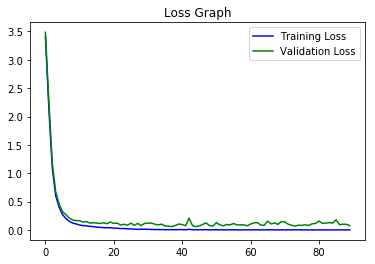

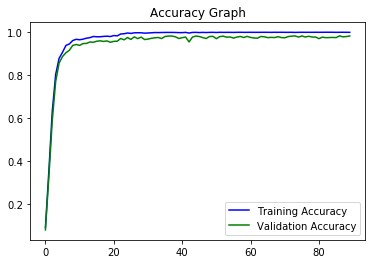

In [18]:
plt.plot(train_loss_all, 'b', label='Training Loss')
plt.plot(valid_loss_all, 'g', label='Validation Loss')
plt.legend(loc=1)
plt.title('Loss Graph')
plt.show()

plt.plot(train_acc_all, 'b', label='Training Accuracy')
plt.plot(valid_acc_all, 'g', label='Validation Accuracy')
plt.legend(loc=4)
plt.title('Accuracy Graph')
plt.show()

In [19]:
#Evaluate the Test Data
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test loss: {:.3F}, Test Accuracy = {:.3f}".format(test_loss, test_accuracy))

Test loss: 0.166, Test Accuracy = 0.969


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [20]:
#load images

import os
import cv2

def load_images(path, new_size=32):
    images = []
    for file in os.listdir(path):
        if not file.startswith('.'):
            #print(file)
            image = cv2.imread(os.path.join(path, file))
            image = cv2.resize(image, (new_size, new_size)) 
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
    return images

In [21]:
path = r'./images/'
xx_test = np.asarray(load_images(path, new_size=32))
yy_test = [1, 24, 38, 12, 31, 23, 5, 22, 15, 14, 40, 14, 33, 13, 13, 12, 33, 35, 18, 18, 34]

actual_test_images = xx_test
# normalize and grayscale
xx_test = convert_to_grayscale(xx_test)
xx_test = normalize(xx_test)
print('done')

done


actual images in 1st row and grayscaled and normalized images in 2nd row


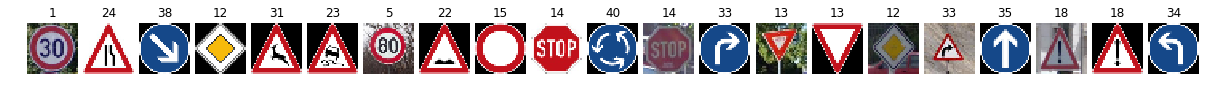

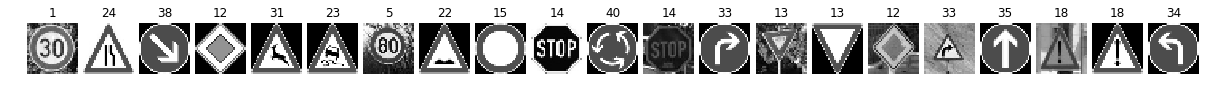

In [22]:
#Load  images
print('actual images in 1st row and grayscaled and normalized images in 2nd row')
print_images(actual_test_images, yy_test, row=1, col=len(yy_test), cmap=None)
print_images(xx_test, yy_test, row=1, col=len(yy_test))

### Predict the Sign Type for Each Image and find the Accuracy

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#Evaluate
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    _, test_accuracy = evaluate(xx_test, yy_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.952


In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    tp_k = sess.run(top_k, feed_dict={x: xx_test, drop_out_fc:1., drop_out_conv:1.})


### Output Top Softmax Probabilities For Each Image Found on the Web

In [25]:
float_formatter = lambda x: "%03.0f" % (x * 100)
np.set_printoptions(formatter={'float_kind':float_formatter})

#  Prediction (%) ->   1, 2, 3 predictions
--------------------------------------------------
01 [100 000 000]  ->  [1 2 5]
02 [100 000 000]  ->  [24 27 28]
03 [100 000 000]  ->  [38 17 13]
04 [100 000 000]  ->  [12 40  2]
05 [100 000 000]  ->  [31 21 25]
06 [100 000 000]  ->  [23 19 20]
07 [097 002 000]  ->  [5 2 3]
08 [100 000 000]  ->  [22 25 29]
09 [100 000 000]  ->  [15 12 35]
10 [100 000 000]  ->  [14  1  2]
11 [100 000 000]  ->  [40 12  7]
12 [100 000 000]  ->  [14  1  2]
13 [100 000 000]  ->  [33 35 37]
14 [100 000 000]  ->  [13  3  2]
15 [100 000 000]  ->  [13  0  1]
16 [100 000 000]  ->  [12 40  0]
17 [061 027 011]  ->  [20 26 18]
18 [100 000 000]  ->  [35 33  3]
19 [100 000 000]  ->  [18 26 27]
20 [100 000 000]  ->  [18 26 27]
21 [100 000 000]  ->  [34 38 35]

wrongly identifid images:
Image wrongly identified as:  20 while actual image is:  33


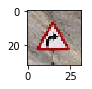

In [53]:
### Print out the top softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print('#  Prediction (%) ->   1, 2, 3 predictions')
print('-'*50)
for x in range(len(tp_k[0])):
    print('{:02d} {}  ->  {}'.format(x+1, tp_k[0][x], tp_k[1][x]))

print('\nwrongly identifid images:')
wrong_images = []
for i in range(len(yy_test)):
    if tp_k[1][i][0] != yy_test[i]:
        print('Image wrongly identified as: ', tp_k[1][i][0], 'while actual image is: ', yy_test[i])
        wrong_images.append(actual_test_images[i])
print_images(wrong_images, None, row=1, col=len(wrong_images))

In [2]:
# import statements
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.color as color
import pickle
import math
from sklearn.utils import shuffle

%matplotlib inline

In [3]:
import pickle
# Load pickled data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


In [4]:
# helper functions
def print_random_images(first_set, labels_set, second_set = None, count = 4):
    """prints random images from the given first and second set, count is how many images to take
    """
    images = []
    labels = []
    if second_set is None:
        rows = count//4
        cols = count//2
    else:
        rows = count//2
        cols = count//2
        
    for i in range(count):
        index = random.randint(0, len(first_set) - 1)
        images.append(first_set[index])
        labels.append(labels_set[index])
        if second_set is not None:
            images.append(second_set[index])
            labels.append(labels_set[index])
           
    print_images(images, labels, row=rows, col=cols)
    
def print_images(data, labels, row = 1, col = 1, cmap = 'gray'):
    """print images from given data array
    """
    row = np.max([math.ceil(row), 1])
    col = np.max([math.ceil(col), 1])
    if row == 1 and col == 1: 
        plt.figure(figsize=(1,1))
        plt.imshow(data[0], cmap=cmap)
    else:
        row_col = row*col
        fig, axs = plt.subplots(row, col, figsize=(row_col, row_col))
        fig.subplots_adjust(hspace = .2, wspace=.1)
        axs = axs.ravel()
        total = np.min([len(data), row_col])
        for x in range(total):
#             print('x: ', x, 'data[x].shape', data[x].shape)
            axs[x].axis('off')
            if labels is not None:
                axs[x].set_title(labels[x])
            if cmap is None:
                axs[x].imshow(data[x].squeeze())  
            else:
                axs[x].imshow(data[x].squeeze(), cmap=cmap)  

def normalize(data):
    """Normalize the given data"""
    return (data - np.min(data))/ (np.max(data) - np.min(data))

def convert_to_grayscale(data):
    """Convert the given images data to grayscale, using the average of the RGB channel. 
    Returns one dimension channel instead of 3"""
    return np.sum(data/3, axis=3, keepdims=True)

            
print('helper functions defined')

helper functions defined


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


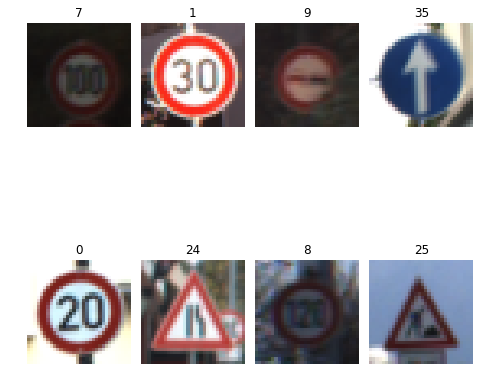

In [11]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print_random_images(X_train, y_train, count=8)

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#convert to grayscale
X_train_gray = convert_to_grayscale(X_train)
X_valid_gray = convert_to_grayscale(X_valid)
X_test_gray = convert_to_grayscale(X_test)

print("Train Image data shape =", X_train_gray[0].shape)
print("Valid Image data shape =", X_valid_gray[0].shape)
print("Test Image data shape =", X_test_gray[0].shape)
print('done')

Train Image data shape = (32, 32, 1)
Valid Image data shape = (32, 32, 1)
Test Image data shape = (32, 32, 1)
done


Showing grayscaled images along with its color counterpart


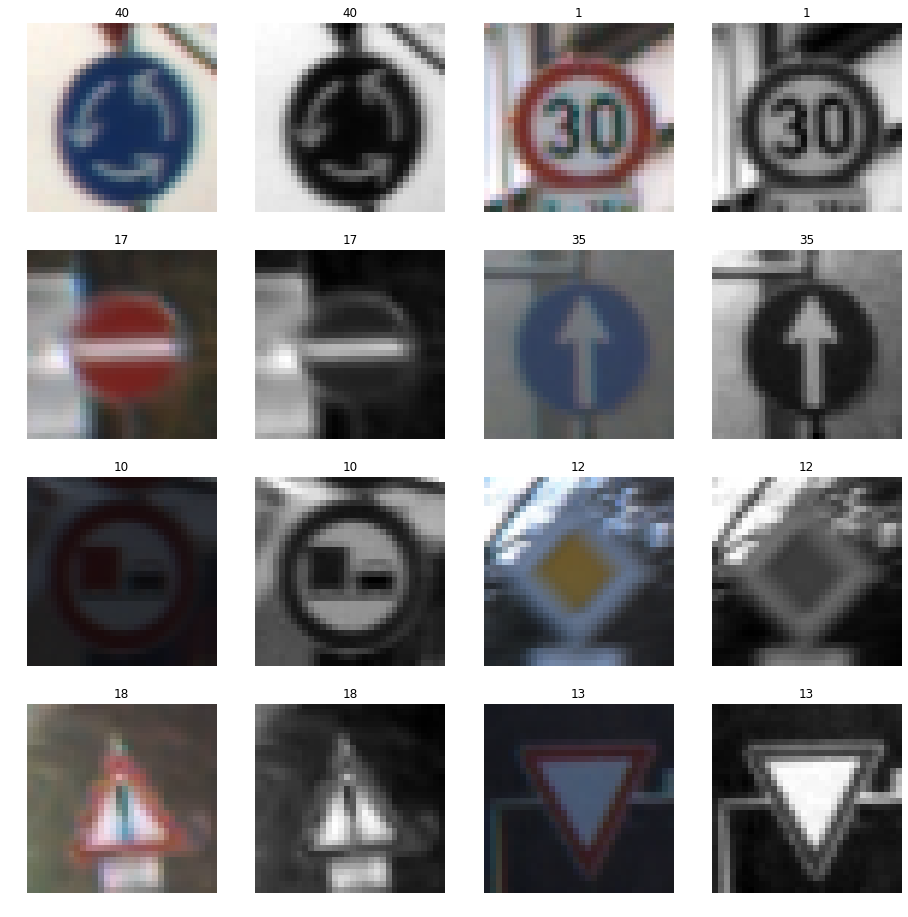

In [13]:
print('Showing grayscaled images along with its color counterpart')
print_random_images(X_train, y_train, X_train_gray, 8)

X_train = X_train_gray
X_valid = X_valid_gray
X_test = X_test_gray

In [15]:
#normalize the data

print('mean before normalization')
print('train: ', np.mean(X_train))
print('valid: ', np.mean(X_valid))
print('test:  ', np.mean(X_test))

X_train_norm = normalize(X_train)
X_valid_norm = normalize(X_valid)
X_test_norm = normalize(X_test)

print('\nmean after normalization')
print('train: ', np.mean(X_train_norm))
print('valid: ', np.mean(X_valid_norm))
print('test:  ', np.mean(X_test_norm))

mean before normalization
train:  82.67758903699634
valid:  83.55642737563775
test:   82.14846036120173

mean after normalization
train:  0.31436706513393753
valid:  0.3142257095025512
test:   0.31134844765419023


# Take Away
As can be seen from the predictions, the model got confused with one images, out of 21 total images.   
This can further be reduced by increasing the training data using Augmentation. 

Analyzing images before and after normalization. Normalization should not alter the images


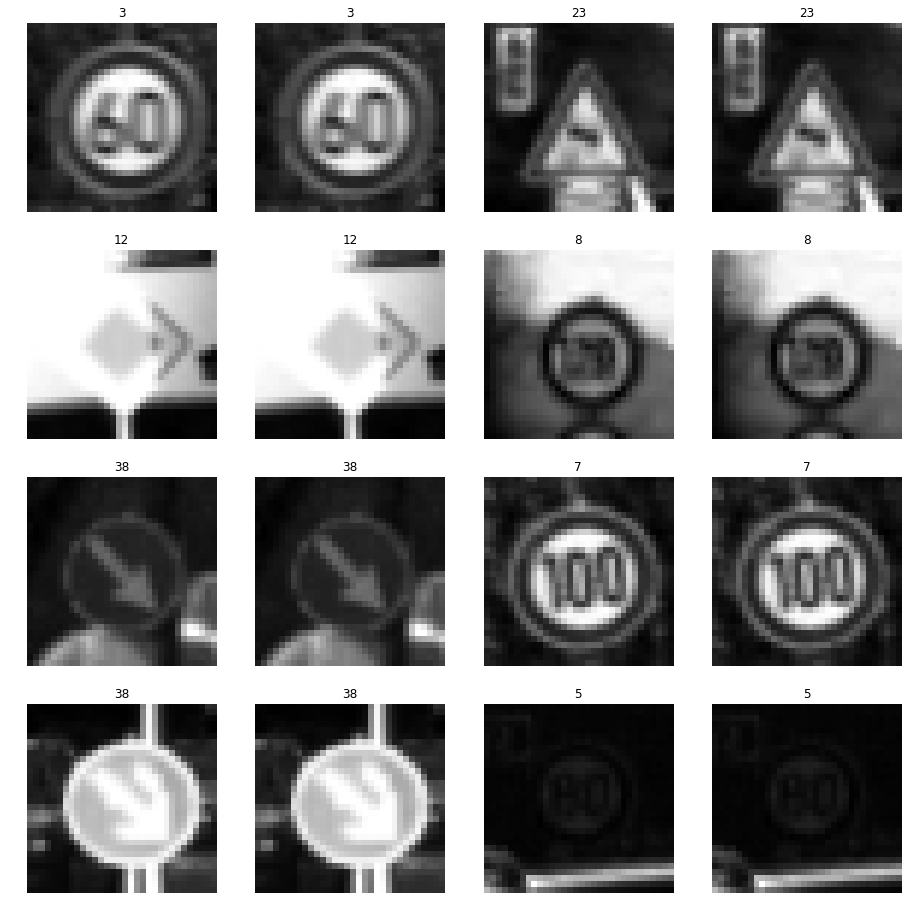

In [16]:
# Analyzing images before and after normalization. Normalization should not alter the images
print('Analyzing images before and after normalization. Normalization should not alter the images')
print_random_images(X_train, y_train, X_train_norm, 8)

X_train = X_train_norm
X_valid = X_valid_norm
X_test = X_test_norm

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 90
BATCH_SIZE = 128
FC1 = 320
FC2 = 150
FC3 = 80
_, _, CHANNEL = X_train[0].shape
filter1 = 6
filter2 = 16
filter3 = 26
filter4 = 42
# filter5 = 30
print('Channel count: ', CHANNEL)

Channel count:  1


In [18]:
# functions for architecture
def create_weights(shape):
    sigma = 0.1
    mu = 0
#     print('create weight: ', shape)
    return tf.Variable(tf.truncated_normal(shape, mean = mu, stddev = sigma))
 
def create_biases(size):
    return tf.Variable(tf.constant(0.05, shape=[size]))

def create_conv_layer(input,
               input_channel,        
               filter_count,
               filter_size = 5,
               drop_out = 1,
               padding='VALID',
               do_max_pool=True):  
    """Create the convolutional layer"""
    strides = [1, 1, 1, 1]
    mu = 0
    sigma = 0.1

    weights = create_weights(shape=[filter_size, filter_size, input_channel, filter_count])
    biases = create_biases(filter_count)

    ## Creating the convolutional layer
    layer = tf.nn.conv2d(input,
                     weights,
                     strides=strides,
                     padding=padding) + biases
    if do_max_pool:
        layer = tf.nn.max_pool(value=layer,
                            ksize=[1, 2, 2, 1],
                            strides=[1, 2, 2, 1],
                            padding=padding)
        print('Max Pool done')

    layer = tf.nn.relu(layer)

    print('Conv Layer output: ', layer.get_shape())
    return layer

def create_connected_layer(input,
                            num_inputs,
                            num_outputs,
                            use_relu=True):
    """Create fully connected layer"""
    weights = create_weights(shape=[num_inputs, num_outputs])
    biases = create_biases(num_outputs)
    layer = tf.add(tf.matmul(input, weights), biases)
    if use_relu:
        layer = tf.nn.relu(layer)
        print('Relu done')
    print('Fully connected Layer output: ', layer.get_shape())
    return layer

In [1]:
#Convolution architecture

from tensorflow.contrib.layers import flatten

def get_logits(x):
    """Get the logits, modified the LeNet architecture"""
    
    #Layer 1: Convolutional. Input = 32x32xCHANNEL. Output = 30x30xfilter1.
    c1 = create_conv_layer(x, CHANNEL, filter1, filter_size=3, do_max_pool=False)
    
    #Layer 2: Convolutional. Output = 14x14xfilter2.
    c2 = create_conv_layer(c1, filter1, filter2, filter_size=3, do_max_pool=True)
    
    c2 = tf.nn.dropout(c2, drop_out_conv)
    
    #Layer 3: Convolutional. Output = 6x6xfilter3.
    c3 = create_conv_layer(c2, filter2, filter3, padding='VALID', filter_size=3, do_max_pool=True)
    
    c3 = tf.nn.dropout(c3, drop_out_conv)

    #Layer 4: Convolutional. Output = 6x6xfilter4.
    c4 = create_conv_layer(c3, filter3, filter4, padding='SAME', filter_size=5, do_max_pool=False)
    
    
    #Flatten. Input = 4x4xfilter3. Output = FC_input.
    flatten = tf.contrib.layers.flatten(c4)
    print('flatten shape: ', flatten.get_shape())
    _,flatten_shape = flatten.get_shape()
    
    #Layer 5: Fully Connected. Input = FC_input. Output = FC1.
    fc1 = create_connected_layer(flatten, int(flatten_shape), FC1)
    
    fc1 = tf.nn.dropout(fc1, drop_out_fc)
    
    #Layer 6: Fully Connected. Input = FC1. Output = FC2.
    fc2 = create_connected_layer(fc1, FC1, FC2)
    
    fc2 = tf.nn.dropout(fc2, drop_out_fc)
    
    #Layer 7: Fully Connected. Input = FC2. Output = FC3.
    fc3 = create_connected_layer(fc2, FC2, FC3)
    
    fc3 = tf.nn.dropout(fc3, drop_out_fc)
    
    #Layer 8: Fully Connected. Input = FC3. Output = 43.
    logits = create_connected_layer(fc3, FC3, n_classes, False)
    
    return logits

In [1]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 90
BATCH_SIZE = 128
FC1 = 320
FC2 = 150
FC3 = 80
_, _, CHANNEL = X_train[0].shape
filter1 = 6
filter2 = 16
filter3 = 26
filter4 = 42
# filter5 = 30
print('Channel count: ', CHANNEL)

NameError: name 'X_train' is not defined

In [2]:
rate = 0.001

logits = get_logits(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

NameError: name 'get_logits' is not defined

In [ ]:
# import statements
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.color as color
import pickle
import math
from sklearn.utils import shuffle
import cv2

%matplotlib inline

# Load pickled data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

# helper functions
def print_random_images(first_set, labels_set, second_set = None, count = 4):
    """prints random images from the given first and second set, count is how many images to take
    """
    images = []
    labels = []
    if second_set is None:
        rows = count//4
        cols = count//2
    else:
        rows = count//2
        cols = count//2
        
    for i in range(count):
        index = random.randint(0, len(first_set) - 1)
        images.append(first_set[index])
        labels.append(labels_set[index])
        if second_set is not None:
            images.append(second_set[index])
            labels.append(labels_set[index])
           
    print_images(images, labels, row=rows, col=cols)
    
def print_images(data, labels, row = 1, col = 1, cmap = 'gray'):
    """print images from given data array
    """
    row = np.max([math.ceil(row), 1])
    col = np.max([math.ceil(col), 1])
    if row == 1 and col == 1: 
        cv2.figure(figsize=(1,1))
        cv2.imshow(data[0], cmap=cmap)
    else:
        row_col = row*col
        fig, axs = plt.subplots(row, col, figsize=(row_col, row_col))
        fig.subplots_adjust(hspace = .2, wspace=.1)
        axs = axs.ravel()
        total = np.min([len(data), row_col])
        for x in range(total):
#             print('x: ', x, 'data[x].shape', data[x].shape)
            axs[x].axis('off')
            if labels is not None:
                axs[x].set_title(labels[x])
            if cmap is None:
                axs[x].imshow(data[x].squeeze())  
            else:
                axs[x].imshow(data[x].squeeze(), cmap=cmap)  

def normalize(data):
    """Normalize the given data"""
    return (data - np.min(data))/ (np.max(data) - np.min(data))

def convert_to_grayscale(data):
    """Convert the given images data to grayscale, using the average of the RGB channel. 
    Returns one dimension channel instead of 3"""
    return np.sum(data/3, axis=3, keepdims=True)

            
print('helper functions defined')

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print_random_images(X_train, y_train, count=10)


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Bibliography
Preprocessing and Data Augmentiation: https://benanne.github.io/2015/03/17/plankton.html  
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html  